In [1]:
from typing_extensions import TypedDict

#### This is the state which works like a memory for the node. Class which will pass the information and typedDict will hold the graph_info value in string format to print what to play

In [2]:
class State1(TypedDict):
    graph_info : str

#### Create 3 nodes - start, badminton, cricket

In [3]:
def start_play(state: State1):
    print("Starting the game...")
    return {"graph_info": state["graph_info"]+"Morning Started."}

def cricket(state: State1):
    print("Playing Cricket...")
    return {"graph_info": state["graph_info"]+" Played Cricket."}

def badminton(state: State1):
    print("Playing Badminton...")
    return {"graph_info": state["graph_info"]+" Played Badminton."}

## Define Logic For Playing 

#### number<0.5 -> play cricket 
#### number>0.5 -> play badminton

In [4]:
import random
from typing import Literal


In [5]:
def random_play(state: State1) -> Literal["cricket", "badminton"]:
    graph_info = state["graph_info"]

    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"
    

#### Orchestrate the graph

In [6]:
from langgraph.graph import StateGraph, START, END

In [7]:
graph = StateGraph(State1)

##### adding nodes

In [8]:
## Adding Nodes 
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", badminton)

In [9]:
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

In [10]:
graph_builder = graph.compile()

In [11]:
from IPython.display import display,Image

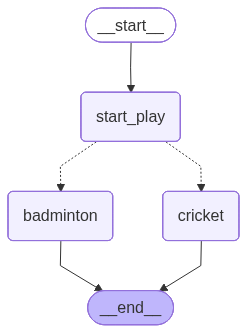

In [12]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [13]:
graph_builder.invoke({"graph_info": "new day started."})

Starting the game...
Playing Cricket...


{'graph_info': 'new day started.Morning Started. Played Cricket.'}